In [1]:
pip install ibm_watson_machine_learning


In [2]:
# Replace the credentials that you get from Watson Machine Learing service
from ibm_watson_machine_learning import APIClient
wml_credentials = {
                    'url': "https://us-south.ml.cloud.ibm.com",
                    'apikey':"1pPtm5dVtrAmH9gdXljeckYdVqTNnq9juvD4eOKW-hG2"}
client = APIClient(wml_credentials)

In [3]:
client = APIClient(wml_credentials)

In [4]:
def guid_from_space_name(client,space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [5]:
space_uid = guid_from_space_name(client,'nutritionanalysis')
print("Space_UID = " + space_uid)

Space_UID = cd494c92-ec51-4640-8e3c-92700da3ef1b


In [6]:
client.set.default_space(space_uid)

'SUCCESS'

In [7]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a1

In [8]:
client.repository.download('31aa03a5-c49e-4c65-9c3f-1cb90474a8c7','nutritionanalysis.tar.gz')

Successfully saved model content to file: 'nutritionanalysis.tar.gz'


'C:\\Users\\akshara\\new/nutritionanalysis.tar.gz'

In [10]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing  import image
import numpy as np
model = load_model("model/nutrition.h5")

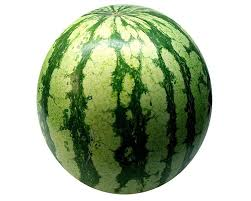

In [11]:
from IPython.display import Image
img=Image(filename=r"C:\Users\akshara\new\Flask\Sample_Images\Test_Image3.jpg")
img

In [12]:
from tensorflow.keras.preprocessing  import image
path2=r"C:\Users\akshara\new\Flask\Sample_Images\Test_Image3.jpg"

img = image.load_img(path2,target_size = (64,64))


In [13]:
x = image.img_to_array(img)#image to array
x = np.expand_dims(x,axis = 0)#changing the shape
pred = np.argmax(model.predict(x))#predicting the classes
pred

1/1 [==============================] - 3s 3s/step


4

In [14]:
index=['APPLES', 'BANANA', 'ORANGE','PINEAPPLE','WATERMELON']
result=str(index[pred])
result

'WATERMELON'